# Make Dynamite Plot

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/DBS_studies_influencing_memory/metadata/master_list.csv'
sheet = None #'master_list_proper_subjects' ?

In [2]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=None, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,study,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,Frequency__Hz_,...,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_spatial_corr_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi_y
0,Acera 2019,0.0,STN_BL,50.0,Impaired,-0.180960,STN,"[14.2, -15.1, -6.1], [-13.5, -14.2, -6.1]",BL,NaN,...,0.011460,9.502533e-08,0.005730,0.0,0.000885,0.000892,0.164717,1.077068e-06,0.082359,0.0
1,Asahi 2014,0.0,STN_BL,11.0,Improved,0.234145,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,130.0,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
2,Barcia 2022,1.0,Fornix_BL,1.0,Mixed,NaN,Fornix,"[-2, 3.5, -1], [2, 3.5, -1]",BL,NaN,...,-0.111364,-9.234180e-07,-0.055682,0.0,-0.004349,-0.004343,-0.802307,-5.246204e-06,-0.401154,0.0
3,Bergfeld 2017,0.0,vALIC_BL,20.0,Impaired,-0.688208,vALIC,"[-11.6, 7.2, -3.2], [12.7, 8.7, -2.4]",BL,140.0,...,-0.029908,-2.479925e-07,-0.014954,0.0,0.000426,0.000432,0.079793,5.217602e-07,0.039897,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011460,9.502533e-08,0.005730,0.0,0.000885,0.000892,0.164717,1.077068e-06,0.082359,0.0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
102,You 2020,0.0,STN_BL,NaN,NaN,NaN,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
103,Zangaglia 2009,0.0,STN_BL,32.0,Improved,0.099419,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0



# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
len(data_df['study'].unique())

In [3]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [4]:
drop_list = ['all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine_x', 'Pre_Post_Memory_Effect_Size__Cohen_s_D_']

In [5]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,study,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,Frequency__Hz_,...,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_spatial_corr_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_cosine_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject_y,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi_y
0,Acera 2019,0.0,STN_BL,50.0,Impaired,-0.180960,STN,"[14.2, -15.1, -6.1], [-13.5, -14.2, -6.1]",BL,NaN,...,0.011460,9.502533e-08,0.005730,0.0,0.000885,0.000892,0.164717,1.077068e-06,0.082359,0.0
1,Asahi 2014,0.0,STN_BL,11.0,Improved,0.234145,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,130.0,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
3,Bergfeld 2017,0.0,vALIC_BL,20.0,Impaired,-0.688208,vALIC,"[-11.6, 7.2, -3.2], [12.7, 8.7, -2.4]",BL,140.0,...,-0.029908,-2.479925e-07,-0.014954,0.0,0.000426,0.000432,0.079793,5.217602e-07,0.039897,0.0
5,Cabrera-Montes 2025,0.0,STN_BL,20.0,Impaired,-0.142554,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,130.0,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
6,Coleshill 1990,1.0,HPC_L,6.0,Improved,0.060798,HPC,"[-28.9, -24.5, -14.2]",L,50.0,...,-0.105099,-8.714673e-07,-0.105099,0.0,-0.003496,-0.003491,-0.456027,-2.981914e-06,-0.456027,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Troster 2017,0.0,STN_BL,136.0,Improved,0.072429,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0
96,Velasco 1987,0.0,CM_BL,5.0,Improved,1.212931,CM,"[-10.8, -21.5, 2.7], [10.8, -21.5, 2.7]",BL,80.0,...,0.036257,3.006364e-07,0.018128,0.0,0.000777,0.000784,0.144738,9.464291e-07,0.072369,0.0
97,Velasco 1987,0.0,Fornix_L,4.0,Impaired,-3.575951,Fornix,"[21.4, -35.5, 7.14]",L,200.0,...,-0.088871,-7.369064e-07,-0.088871,0.0,-0.001317,-0.001312,-0.171440,-1.121027e-06,-0.171440,0.0
98,Volonte 2021,0.0,STN_BL,18.0,Improved,0.267173,STN,"[-16.7, -6.0, -1.7], [18.6, -5.3, -1.7]",BL,NaN,...,-0.171190,-1.419487e-06,-0.085595,0.0,-0.000440,-0.000434,-0.080103,-5.237877e-07,-0.040052,0.0


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [6]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [ ]:
data_df.Disease.unique()

In [ ]:
column = 'Memory_Specific'  # The column you'd like to evaluate
condition = 'equal'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

In [ ]:
data_df_sorted = data_df.sort_values(by='Location')
data_df_sorted

Regress out Covariates

In [ ]:
data_df.columns

In [ ]:
dependent_variable_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']
regressors = ['Disease', 'Years_Between_Measurements', 'Mean_Age', 'Closed_Loop']

In [ ]:
#Impute covariates in if desired
for col in regressors:
    if data_df[col].dtype == 'O':  # object/categorical
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:  # numeric
        data_df[col] = data_df[col].fillna(data_df[col].mean())
data_df[regressors].isna().sum()

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
data_df.columns

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [ ]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)

Do Miscellaneous Data Cleaning

In [ ]:
# data_df = data_df[(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] >= -1) & (data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] <= 1)]

In [8]:
import numpy as np

data_df['cohen_sign'] = np.where(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] > 0, 1, 0)
data_df['cohen_sign']

0      0
1      1
3      0
5      0
6      1
      ..
94     1
96     1
97     0
98     1
103    1
Name: cohen_sign, Length: 63, dtype: int64

# Generate the Plot

In [7]:
data_df.columns

Index(['study', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements', 'Mean_Age',
       'Percent_Female', 'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Control_Group', 'Notes', 'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'path',
       'all_datasets_weighted_avg_r_map_inverted_spatial_corr',
       'all_datasets_weighted_avg_r_map_inverted_cosine',
       'all_datasets_weighted_avg_r_map_inverted_sum',
       'all_datasets_weighted_avg_r_map_inverted_average_subject_in_target',
       'all_datasets_weighted_avg_r_map_inverted_average_target_in_sub

In [34]:
x_col = 'cohen_sign'
y_col = 'all_datasets_weighted_avg_r_map_sum'

In [35]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/weighted_map_flipped_lesions'

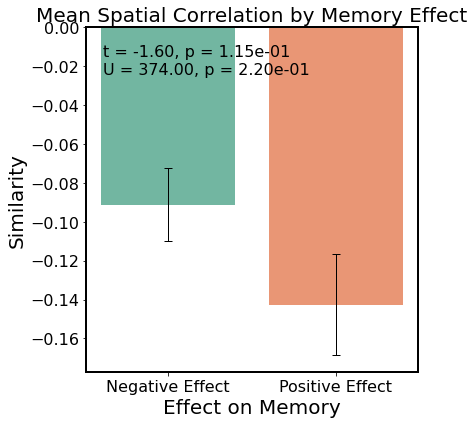

In [36]:
from calvin_utils.statistical_utils.dynamite_plot import DynamitePlotter
plotter = DynamitePlotter()
plotter.plot(
    df=data_df,
    xlabel="Effect on Memory",
    ylabel="Similarity",
    group_col=x_col,
    y_col=y_col,
    dataset_name='Mean Spatial Correlation by Memory Effect',
    out_dir=out_dir
)